# **Synthetic Data: Can We Trust Statistical Estimators?**

**(c) SYNDARA**

Results in "Synthetic Data: Can We Trust Statistical Estimators?", presented during the 1st Workshop on Deep Generative Models for Health at NeurIPS 2023.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import plotnine
from plotnine import *
from utils.disease import ground_truth
from utils.eval import plot_bias, plot_convergence_rate, table_convergence_rate, summary_table, plot_type_I_II_error

## Load meta data

In [3]:
sim_dir = 'simulation_study1/'
meta_data = pd.read_csv(sim_dir + 'meta_data.csv')

In [4]:
data_gt, data_rescale = ground_truth()

## Bias and consistency

**Plot main text**

/data/gent/vo/001/gvo00171/python_lib/lib/python3.10/site-packages/plotnine/scales/scales.py:50: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.



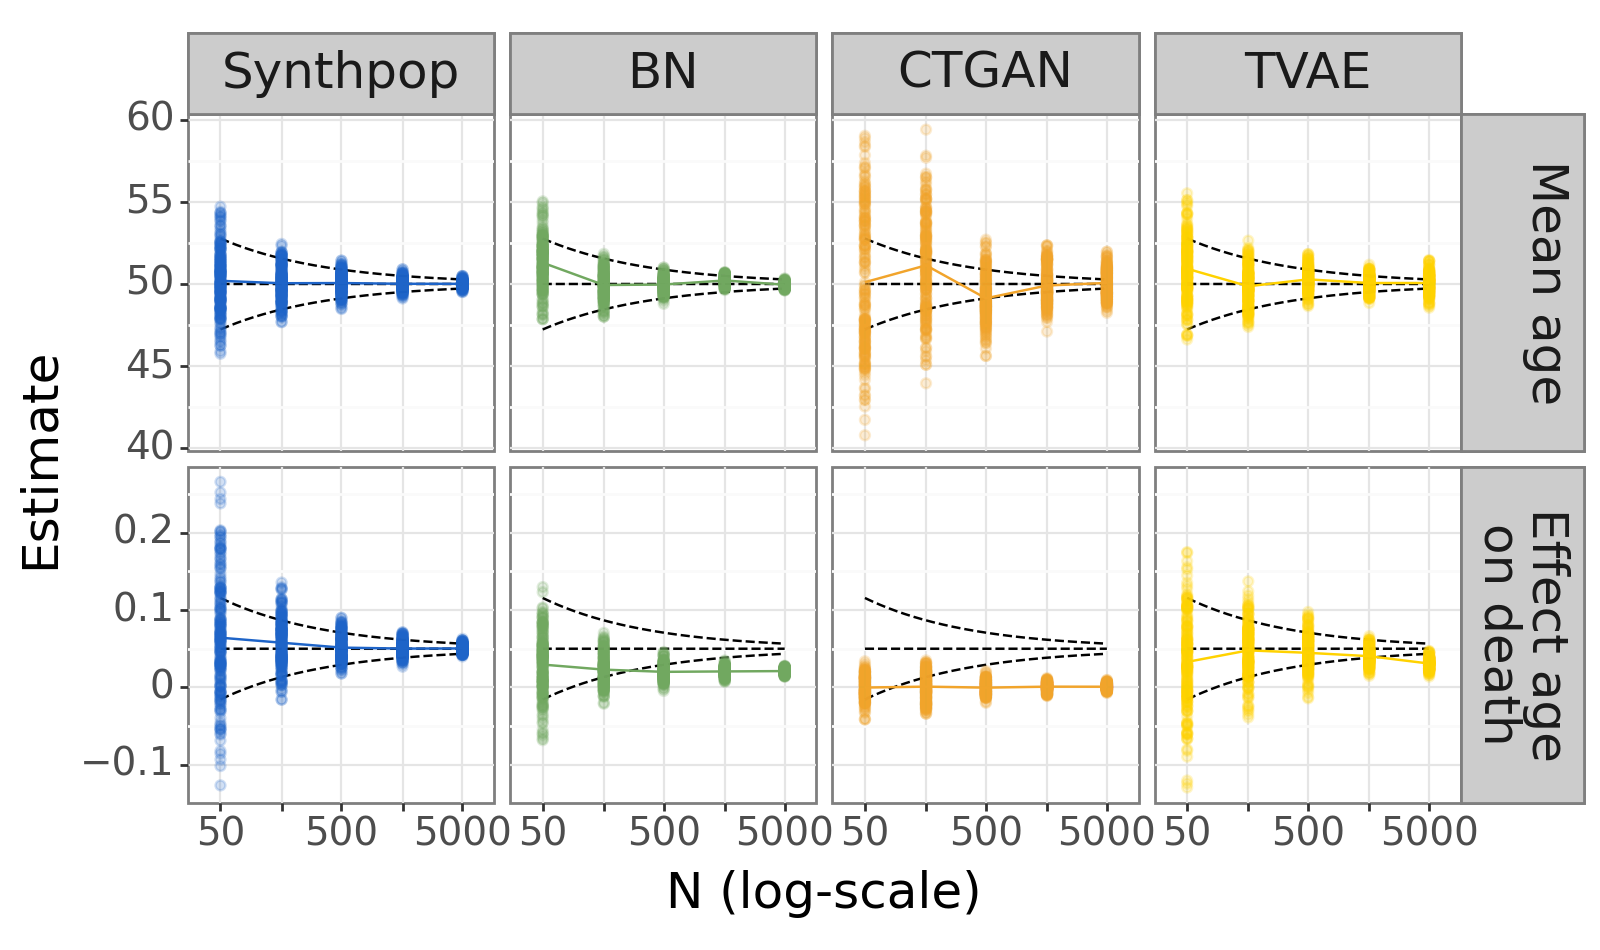

<Figure Size: (800 x 475)>

In [6]:
# Relabel
relabel_estimators = {'age_mean': 'Mean age\n', 
                      'death_age_logr': 'Effect age\non death'}
relabel_generators = {'synthpop': 'Synthpop', 
                      'bayesian_network_DAG': 'BN',
                      'custom_ctgan': 'CTGAN',
                      'custom_tvae': 'TVAE'}

# Plot
plot_bias(meta_data.query('generator != \'original\''),
                                 select_estimators=['age_mean',
                                                    'death_age_logr'],
                                 order_generators=['synthpop', 'bayesian_network_DAG', 'custom_ctgan', 'custom_tvae'],
                                 plot_outliers=False,
                                 unit_rescale=data_rescale,
                                 plot_estimates=True,
                                 ground_truth=data_gt) +\
    facet_grid('estimator ~ generator', scales='free', labeller=labeller(cols=lambda x: relabel_generators[x], rows=lambda x: relabel_estimators[x])) +\
    scale_x_continuous(limits=[35,7000], breaks=[50,160,500,1600,5000], labels=[50,'',500,'',5000], trans='log') +\
    labs(x='N (log-scale)') +\
    theme(plot_title=element_blank(),
          axis_title=element_text(size=18),
          strip_text=element_text(size=18),
          strip_text_y=element_text(margin={'l': 3, 'r': 3, 'units': 'pt'}),
          axis_text=element_text(size=14))

**Plot appendix**

/data/gent/vo/001/gvo00171/python_lib/lib/python3.10/site-packages/plotnine/scales/scales.py:50: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.



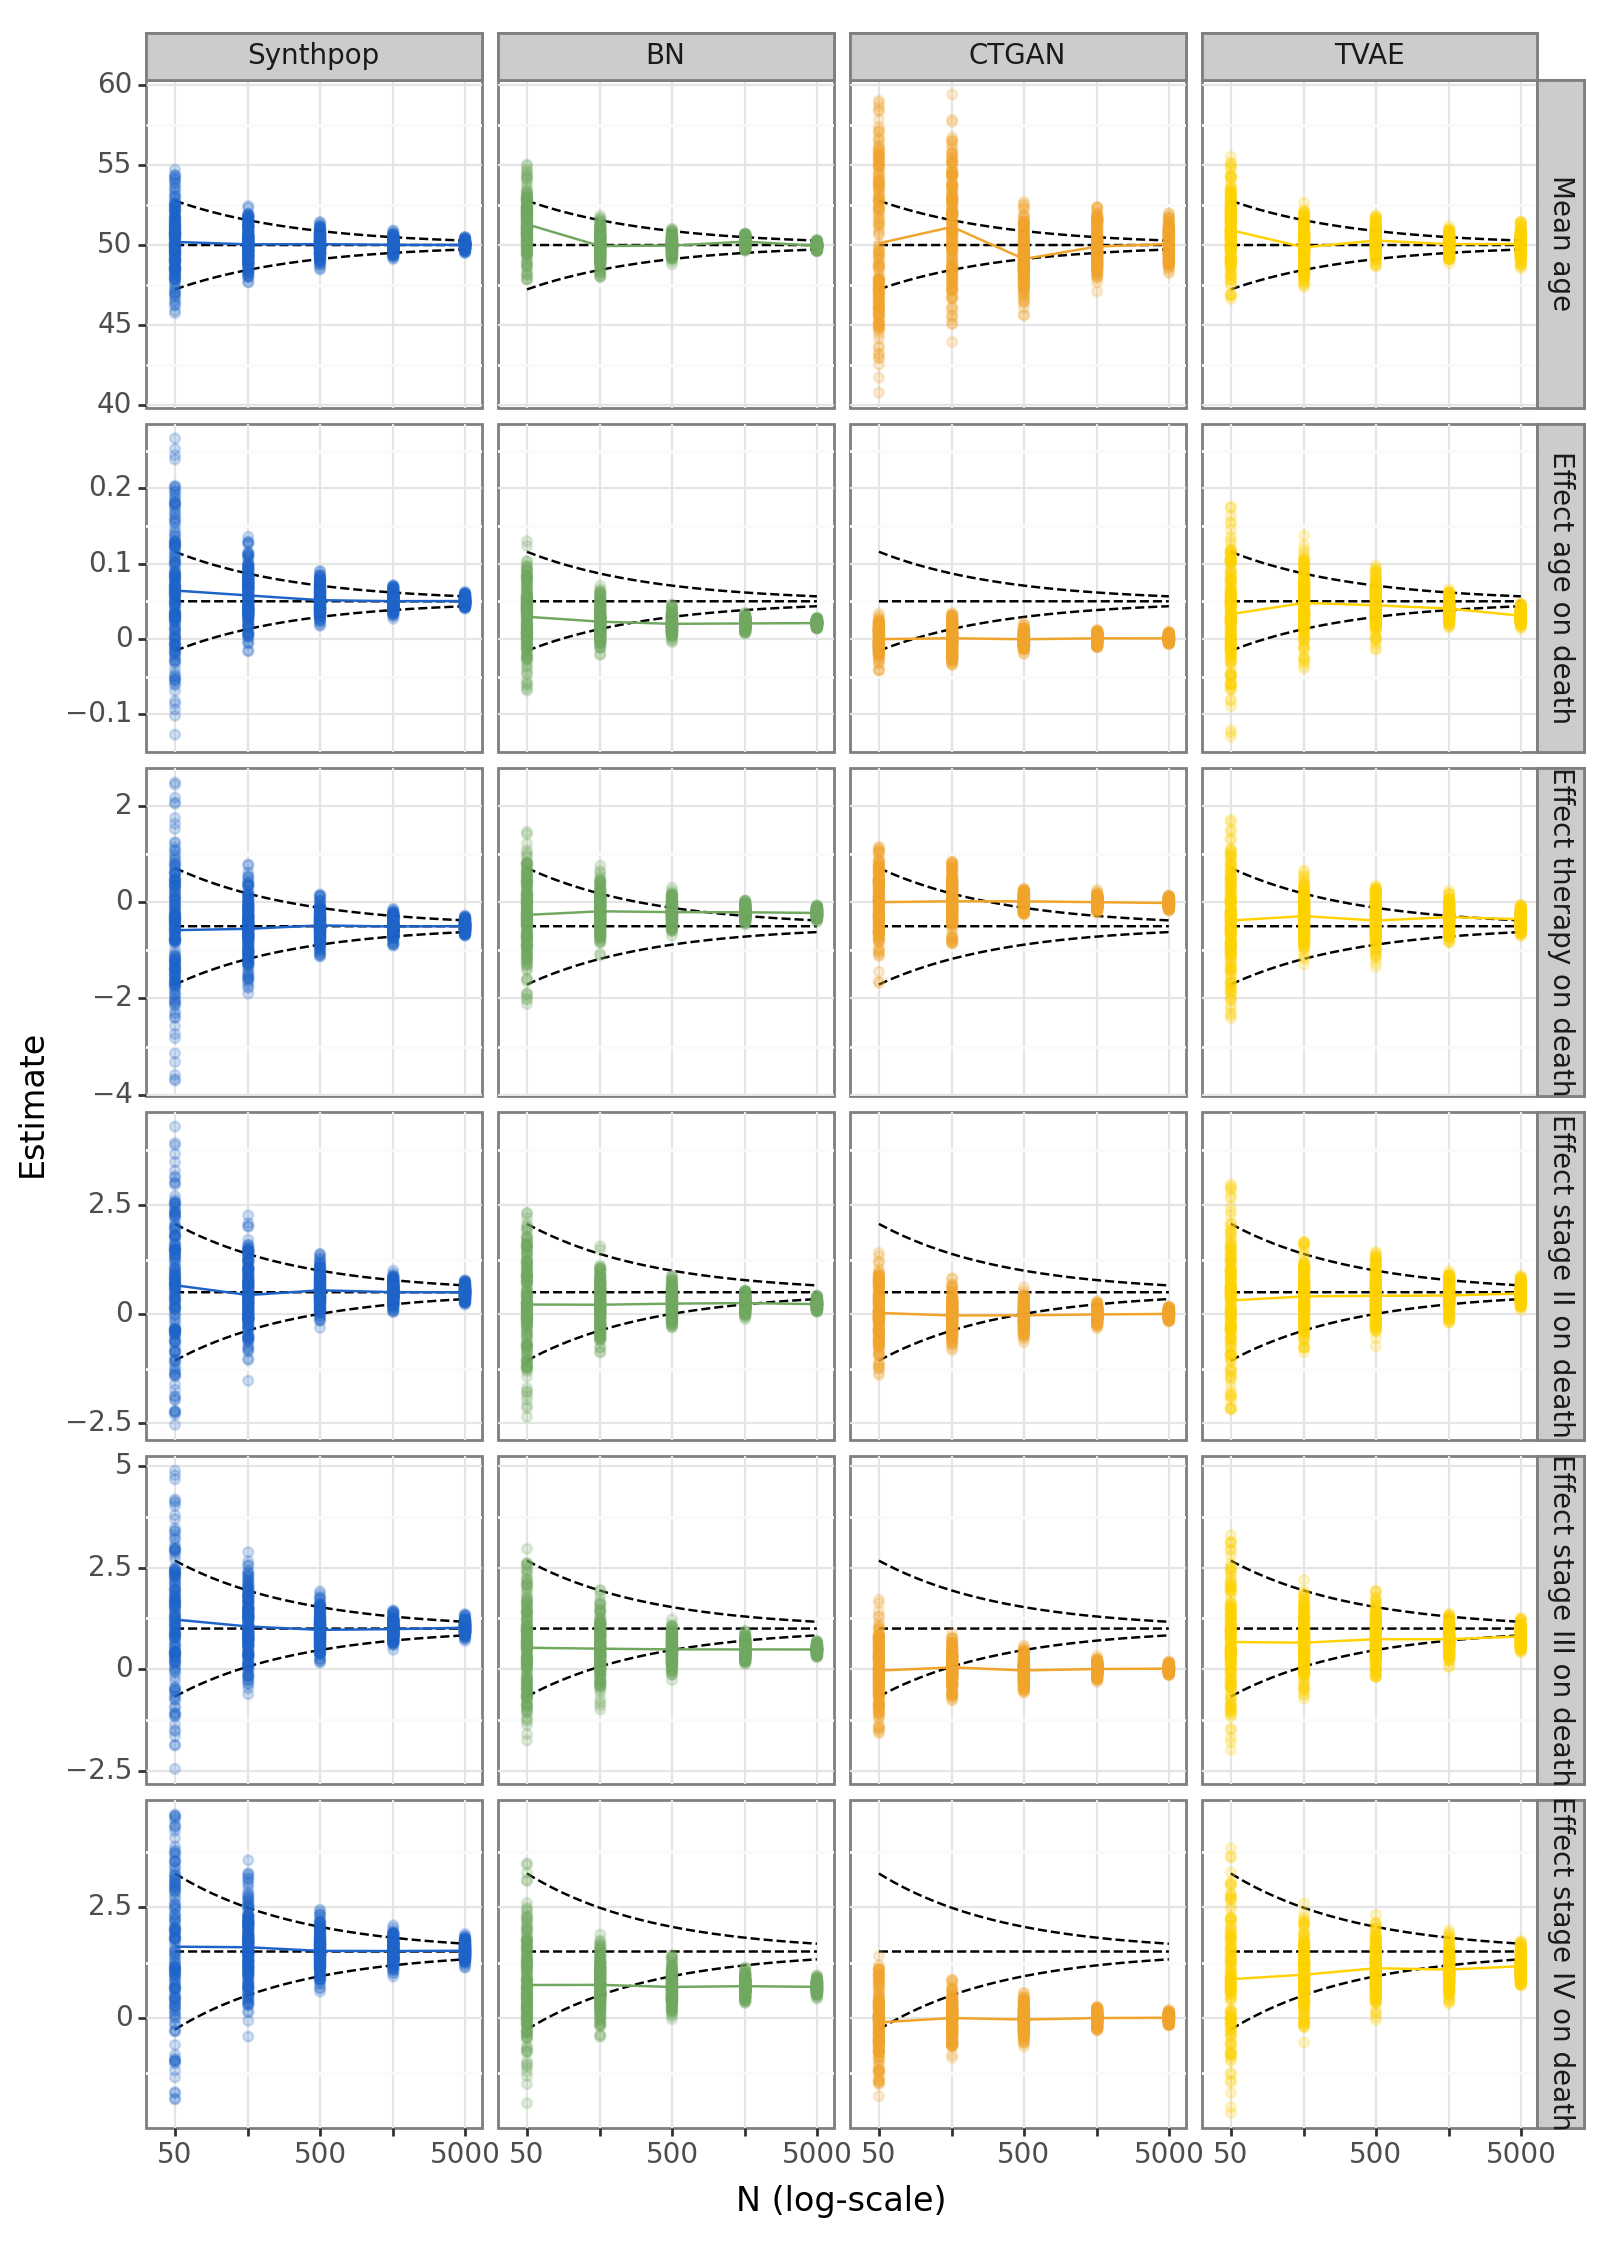

<Figure Size: (800 x 1125)>

In [7]:
# Relabel
relabel_estimators = {'age_mean': 'Mean age', 
                      'death_age_logr': 'Effect age on death',
                      'death_therapy_logr': 'Effect therapy on death',
                      'death_stage_II_logr': 'Effect stage II on death',
                      'death_stage_III_logr': 'Effect stage III on death',
                      'death_stage_IV_logr': 'Effect stage IV on death'}
relabel_generators = {'synthpop': 'Synthpop', 
                      'bayesian_network_DAG': 'BN',
                      'custom_ctgan': 'CTGAN',
                      'custom_tvae': 'TVAE'}

# Plot
plot_bias(meta_data.query('generator != \'original\''),
                                     select_estimators=['age_mean',
                                                        'death_age_logr', 'death_therapy_logr', 'death_stage_II_logr', 'death_stage_III_logr', 'death_stage_IV_logr'],
                                     order_generators=['synthpop', 'bayesian_network_DAG', 'custom_ctgan', 'custom_tvae'],
                                     plot_outliers=False,
                                     unit_rescale=data_rescale,
                                     plot_estimates=True,
                                     ground_truth=data_gt) +\
    facet_grid('estimator ~ generator', scales='free', labeller=labeller(cols=lambda x: relabel_generators[x], rows=lambda x: relabel_estimators[x])) +\
    scale_x_continuous(limits=[40,5110], breaks=[50,160,500,1600,5000], labels=[50,'',500,'',5000], trans='log') +\
    labs(x='N (log-scale)') +\
    theme(plot_title=element_blank(),
          axis_title=element_text(size=12),
          strip_text=element_text(size=10),
          axis_text=element_text(size=10))

## Convergence rate

**Table SE (main text)**

In [5]:
# Presets
order_columns = ['original', 'synthpop', 'bayesian_network_DAG', 'custom_ctgan', 'custom_tvae']
order_columns = [('convergence rate', generator) for generator in order_columns]
select_rows = ['age_mean_bias', 'death_age_logr_bias']

# Display table
conv_rate_se = table_convergence_rate(meta_data,
                                      unit_rescale=data_rescale,
                                      metric='se',
                                      round_decimals=2,
                                      show_ci=True)
conv_rate_se.pivot(index='estimator', columns='generator').loc[select_rows,order_columns].transpose()

estimator                                  age_mean_bias death_age_logr_bias
                 generator                                                  
convergence rate original              0.50 [0.49; 0.50]   0.49 [0.47; 0.52]
                 synthpop              0.45 [0.43; 0.47]   0.43 [0.36; 0.49]
                 bayesian_network_DAG  0.50 [0.49; 0.50]   0.50 [0.47; 0.52]
                 custom_ctgan          0.29 [0.25; 0.32]   0.53 [0.47; 0.58]
                 custom_tvae           0.39 [0.33; 0.46]   0.40 [0.36; 0.44]

**Table SE (appendix)**

In [6]:
# Presets
order_columns = ['original', 'synthpop', 'bayesian_network_DAG', 'custom_ctgan', 'custom_tvae']
order_columns = [('convergence rate', generator) for generator in order_columns]
select_rows = ['age_mean_bias',
               'death_age_logr_bias', 'death_therapy_logr_bias', 'death_stage_II_logr_bias', 'death_stage_III_logr_bias', 'death_stage_IV_logr_bias']

# Display table
conv_rate_se = table_convergence_rate(meta_data,
                                      unit_rescale=data_rescale,
                                      metric='se',
                                      round_decimals=2,
                                      show_ci=True)
conv_rate_se.pivot(index='estimator', columns='generator').loc[select_rows,order_columns]

convergence rate                     \
generator                           original           synthpop   
estimator                                                         
age_mean_bias              0.50 [0.49; 0.50]  0.45 [0.43; 0.47]   
death_age_logr_bias        0.49 [0.47; 0.52]  0.43 [0.36; 0.49]   
death_therapy_logr_bias    0.50 [0.48; 0.51]  0.44 [0.39; 0.49]   
death_stage_II_logr_bias   0.49 [0.47; 0.50]  0.44 [0.40; 0.48]   
death_stage_III_logr_bias  0.49 [0.48; 0.51]  0.44 [0.39; 0.49]   
death_stage_IV_logr_bias   0.49 [0.48; 0.51]  0.44 [0.41; 0.47]   

                                                                   \
generator                 bayesian_network_DAG       custom_ctgan   
estimator                                                           
age_mean_bias                0.50 [0.49; 0.50]  0.29 [0.25; 0.32]   
death_age_logr_bias          0.50 [0.47; 0.52]  0.53 [0.47; 0.58]   
death_therapy_logr_bias      0.49 [0.47; 0.51]  0.51 [0.47; 0.56]   
death_stage_II_logr_bias     0.49 [0.46; 0.51]  0.52 [0.50; 0.55]   
death_stage_III_logr_bias    0.49 [0.46; 0.51]  0.53 [0.51; 0.55]   
death_stage_IV_logr_bias     0.49 [0.47; 0.50]  0.54 [0.51; 0.56]   

                                              
generator                        custom_tvae  
estimator                                     
age_mean_bias              0.39 [0.33; 0.46]  
death_age_logr_bias        0.40 [0.36; 0.44]  
death_therapy_logr_bias    0.41 [0.38; 0.43]  
death_stage_II_logr_bias   0.41 [0.40; 0.43]  
death_stage_III_logr_bias  0.42 [0.40; 0.43]  
death_stage_IV_logr_bias   0.41 [0.38; 0.43]

**Plot SE (appendix)**

/data/gent/vo/001/gvo00171/python_lib/lib/python3.10/site-packages/plotnine/scales/scales.py:50: PlotnineWarning: Scale for 'color' is already present.
Adding another scale for 'color',
which will replace the existing scale.

/data/gent/vo/001/gvo00171/python_lib/lib/python3.10/site-packages/plotnine/scales/scales.py:50: PlotnineWarning: Scale for 'linetype' is already present.
Adding another scale for 'linetype',
which will replace the existing scale.



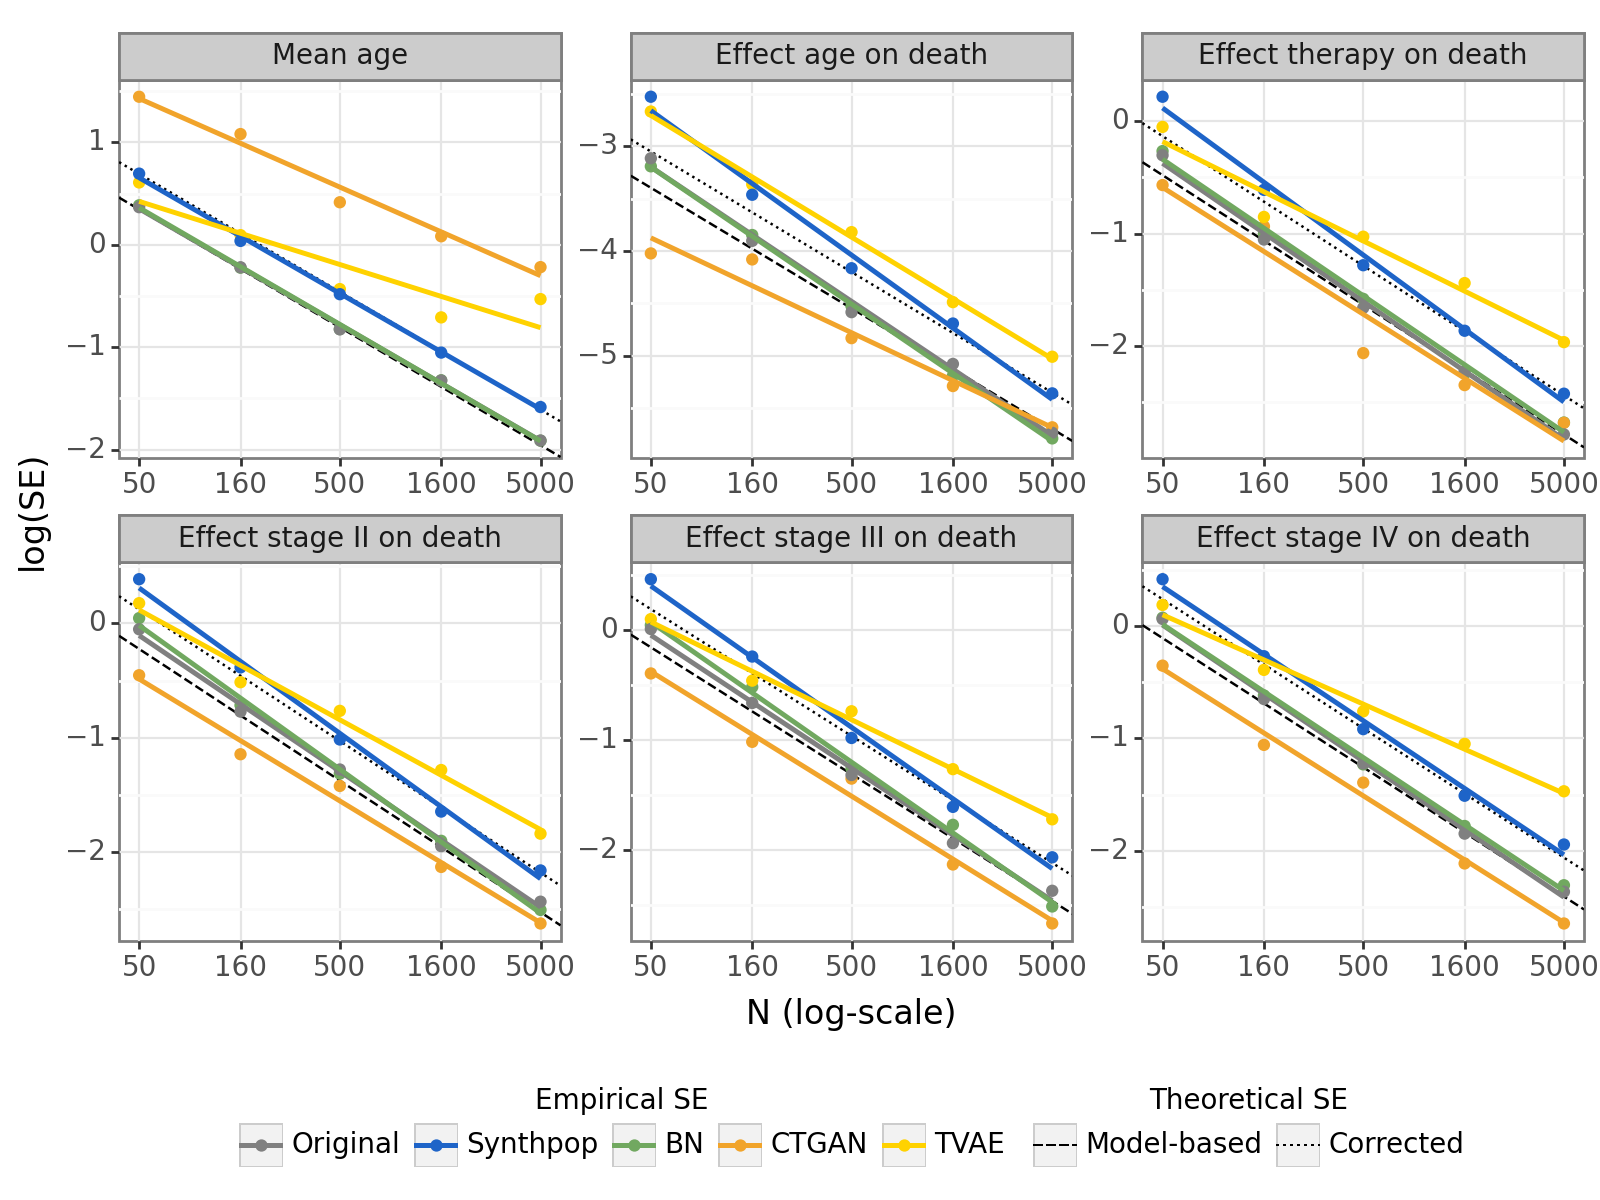

<Figure Size: (800 x 600)>

In [10]:
# Relabel
relabel_estimators = {'age_mean_bias': 'Mean age', 
                      'death_age_logr_bias': 'Effect age on death',
                      'death_therapy_logr_bias': 'Effect therapy on death',
                      'death_stage_II_logr_bias': 'Effect stage II on death',
                      'death_stage_III_logr_bias': 'Effect stage III on death',
                      'death_stage_IV_logr_bias': 'Effect stage IV on death'}
relabel_generators = {'original': 'Original',
                      'synthpop': 'Synthpop', 
                      'bayesian_network_DAG': 'BN',
                      'custom_ctgan': 'CTGAN',
                      'custom_tvae': 'TVAE'}
# Plot
plot_convergence_rate(meta_data,
                      select_estimators=['age_mean',
                                         'death_age_logr', 'death_therapy_logr', 'death_stage_II_logr', 'death_stage_III_logr', 'death_stage_IV_logr'],
                      order_generators=['original', 'synthpop', 'bayesian_network_DAG', 'custom_ctgan', 'custom_tvae'],
                      figure_size=(8,6),
                      unit_rescale=data_rescale, 
                      metric='se', 
                      check_root_n=False) +\
    facet_wrap('estimator', scales='free', labeller=labeller(cols=lambda x: relabel_estimators[x])) +\
    labs(color='Empirical SE', linetype='Theoretical SE', x='N (log-scale)', y='log(SE)') +\
    scale_colour_manual(values={'original': '#808080', 'synthpop': '#1E64C8', 'bayesian_network_DAG': '#71A860', # relabel legend
                                'custom_ctgan': '#F1A42B', 'custom_tvae': '#FFD200'},
                        labels=['Original', 'Synthpop', 'BN', 'CTGAN', 'TVAE']) +\
    scale_linetype_manual(values={'naive': 'dashed', 'corrected': 'dotted'}, # relabel legend
                          labels=['Model-based', 'Corrected']) +\
    theme(plot_title=element_blank(),
          axis_title=element_text(size=12),
          strip_text=element_text(size=10),
          axis_text=element_text(size=10),
          legend_position='bottom',
          legend_title=element_text(size=10),
          legend_title_align='center',
          legend_text=element_text(size=10))

**Table Bias (appendix)**

In [7]:
# Presets
order_columns = ['original', 'synthpop', 'bayesian_network_DAG', 'custom_ctgan', 'custom_tvae']
order_columns = [('convergence rate', generator) for generator in order_columns]
select_rows = ['age_mean_bias',
               'death_age_logr_bias', 'death_therapy_logr_bias', 'death_stage_II_logr_bias', 'death_stage_III_logr_bias', 'death_stage_IV_logr_bias']

# Display table
conv_rate_se = table_convergence_rate(meta_data,
                                      unit_rescale=data_rescale,
                                      metric='bias',
                                      round_decimals=2,
                                      show_ci=True)
conv_rate_se.pivot(index='estimator', columns='generator').loc[select_rows,order_columns]

convergence rate                     \
generator                           original           synthpop   
estimator                                                         
age_mean_bias              0.93 [0.81; 1.04]  0.93 [0.79; 1.07]   
death_age_logr_bias        0.88 [0.66; 1.10]  0.81 [0.65; 0.97]   
death_therapy_logr_bias    0.91 [0.82; 0.99]  0.91 [0.87; 0.96]   
death_stage_II_logr_bias   0.99 [0.74; 1.24]  1.03 [0.85; 1.22]   
death_stage_III_logr_bias  0.90 [0.68; 1.13]  0.84 [0.64; 1.04]   
death_stage_IV_logr_bias   0.84 [0.75; 0.92]  0.80 [0.67; 0.93]   

                                                                   \
generator                 bayesian_network_DAG       custom_ctgan   
estimator                                                           
age_mean_bias                0.68 [0.44; 0.93]  0.59 [0.33; 0.85]   
death_age_logr_bias          0.32 [0.18; 0.47]  0.24 [0.15; 0.32]   
death_therapy_logr_bias      0.41 [0.26; 0.57]  0.33 [0.21; 0.44]   
death_stage_II_logr_bias     0.46 [0.29; 0.63]  0.36 [0.23; 0.49]   
death_stage_III_logr_bias    0.37 [0.23; 0.52]  0.27 [0.17; 0.37]   
death_stage_IV_logr_bias     0.32 [0.19; 0.45]  0.22 [0.14; 0.29]   

                                              
generator                        custom_tvae  
estimator                                     
age_mean_bias              0.65 [0.53; 0.78]  
death_age_logr_bias        0.51 [0.20; 0.82]  
death_therapy_logr_bias    0.51 [0.29; 0.73]  
death_stage_II_logr_bias   0.66 [0.54; 0.79]  
death_stage_III_logr_bias  0.47 [0.34; 0.60]  
death_stage_IV_logr_bias   0.42 [0.31; 0.52]

## SE underestimation

**Synthpop and BN DAG (main text)**

In [8]:
# Presets
select_generators = ['synthpop', 'bayesian_network_DAG'] 
select_n = [50, 5000]
select_metrics = ['relative_bias', 'SE_underestimation']
order_columns = ['n', 'estimator'] + select_metrics
select_rows = ['age_mean', 'death_age_logr']

# Display table
summary_data = summary_table(meta_data, ground_truth=data_gt, select_estimators=select_rows) 
se_underest = pd.DataFrame({})
for gen in select_generators:
    se_underest = pd.concat([se_underest,
                             summary_data.query(f'generator==\'{gen}\' & n in {select_n}')[order_columns].pivot(index='estimator', columns='n').loc[select_rows]],
                            axis=1)
(se_underest*100).round(decimals=2) # in percentage

relative_bias       SE_underestimation        relative_bias  \
n                       50    5000               50     5000          50     
estimator                                                                    
age_mean                0.20  0.01             -36.21 -31.23          2.59   
death_age_logr         30.55  0.83             -38.11 -28.42        -41.76   

                      SE_underestimation        
n                5000               50    5000  
estimator                                       
age_mean        -0.10              -6.17 -2.32  
death_age_logr -57.81              -9.98 -3.13

**Custom CTGAN and custom TVAE (main text)**

In [9]:
# Presets
select_generators = ['custom_ctgan', 'custom_tvae']
select_n = [50, 5000]
select_metrics = ['relative_bias', 'SE_underestimation']
order_columns = ['n', 'estimator'] + select_metrics
select_rows = ['age_mean', 'death_age_logr']

# Display table
summary_data = summary_table(meta_data, ground_truth=data_gt, select_estimators=select_rows) 
se_underest = pd.DataFrame({})
for gen in select_generators:
    se_underest = pd.concat([se_underest,
                             summary_data.query(f'generator==\'{gen}\' & n in {select_n}')[order_columns].pivot(index='estimator', columns='n').loc[select_rows]],
                            axis=1)
(se_underest*100).round(decimals=2) # in percentage

relative_bias        SE_underestimation        relative_bias  \
n                       50     5000               50     5000          50     
estimator                                                                     
age_mean                0.21   0.13             -51.19 -79.15          1.81   
death_age_logr       -100.83 -98.41              24.45 -29.73        -29.65   

                      SE_underestimation         
n                5000               50     5000  
estimator                                        
age_mean         0.13             -48.92 -75.99  
death_age_logr -37.95             -18.03 -53.96

**Synthpop and BN DAG (appendix)**

In [10]:
# Presets
select_generators = ['synthpop', 'bayesian_network_DAG'] 
select_n = [50, 5000]
select_metrics = ['relative_bias', 'SE_underestimation']
order_columns = ['n', 'estimator'] + select_metrics
select_rows = ['age_mean', 
               'death_age_logr', 'death_therapy_logr', 'death_stage_II_logr', 'death_stage_III_logr', 'death_stage_IV_logr']

# Display table
summary_data = summary_table(meta_data, ground_truth=data_gt, select_estimators=select_rows) 
se_underest = pd.DataFrame({})
for gen in select_generators:
    se_underest = pd.concat([se_underest,
                             summary_data.query(f'generator==\'{gen}\' & n in {select_n}')[order_columns].pivot(index='estimator', columns='n').loc[select_rows]],
                            axis=1)
(se_underest*100).round(decimals=2) # in percentage

relative_bias       SE_underestimation         \
n                             50    5000               50     5000   
estimator                                                            
age_mean                      0.20  0.01             -36.21 -31.23   
death_age_logr               30.55  0.83             -38.11 -28.42   
death_therapy_logr           23.94 -0.26             -34.81 -30.13   
death_stage_II_logr          31.98 -0.04             -30.26 -30.46   
death_stage_III_logr         23.83  2.31             -31.76 -32.47   
death_stage_IV_logr           7.29  1.15             -25.42 -36.90   

                     relative_bias        SE_underestimation         
n                             50     5000               50     5000  
estimator                                                            
age_mean                      2.59  -0.10              -6.17  -2.32  
death_age_logr              -41.76 -57.81              -9.98  -3.13  
death_therapy_logr          -50.16 -55.24             -11.63 -15.83  
death_stage_II_logr         -49.14 -54.56             -12.22  -6.64  
death_stage_III_logr        -42.65 -51.54              -6.69   0.39  
death_stage_IV_logr         -45.20 -53.25              -9.68 -16.36

**Custom CTGAN and custom TVAE (appendix)**

In [11]:
# Presets
select_generators = ['custom_ctgan', 'custom_tvae']
select_n = [50, 5000]
select_metrics = ['relative_bias', 'SE_underestimation']
order_columns = ['n', 'estimator'] + select_metrics
select_rows = ['age_mean', 
               'death_age_logr', 'death_therapy_logr', 'death_stage_II_logr', 'death_stage_III_logr', 'death_stage_IV_logr']

# Display table
summary_data = summary_table(meta_data, ground_truth=data_gt, select_estimators=select_rows) 
se_underest = pd.DataFrame({})
for gen in select_generators:
    se_underest = pd.concat([se_underest,
                             summary_data.query(f'generator==\'{gen}\' & n in {select_n}')[order_columns].pivot(index='estimator', columns='n').loc[select_rows]],
                            axis=1)
(se_underest*100).round(decimals=2) # in percentage

relative_bias        SE_underestimation         \
n                             50     5000               50     5000   
estimator                                                             
age_mean                      0.21   0.13             -51.19 -79.15   
death_age_logr             -100.83 -98.41              24.45 -29.73   
death_therapy_logr          -99.92 -96.48              10.41 -17.28   
death_stage_II_logr        -104.41 -99.37              38.07   6.12   
death_stage_III_logr       -104.58 -98.90              30.65  12.75   
death_stage_IV_logr        -104.90 -99.79              25.92  10.90   

                     relative_bias        SE_underestimation         
n                             50     5000               50     5000  
estimator                                                            
age_mean                      1.81   0.13             -48.92 -75.99  
death_age_logr              -29.65 -37.95             -18.03 -53.96  
death_therapy_logr          -17.43 -28.77             -21.86 -57.59  
death_stage_II_logr         -37.74  -5.12             -19.34 -51.34  
death_stage_III_logr        -34.81 -19.28             -10.76 -53.25  
death_stage_IV_logr         -41.73 -21.86              -9.56 -63.30

## Type 1 error

**Table (main text)**

In [12]:
# Presets 
select_generators = ['synthpop', 'bayesian_network_DAG', 'custom_ctgan', 'custom_tvae']
select_n = [50, 5000]
select_estimator = 'age_mean'
select_estimators = [select_estimator + suffix for suffix in ['_NHST_type1', '_NHST_type1_corrected']]

# Display table
type1_error = meta_data.groupby(['n', 'generator'])[select_estimators].mean().reset_index().melt(
    id_vars=['n', 'generator'],
    var_name='error',
    value_name='probability') 
type1_error.query(f'generator in {select_generators} & n in {select_n}').pivot(index='generator', columns=['n', 'error']).loc[select_generators]*100 # in percentage

probability                      \
n                                   50                  5000   
error                age_mean_NHST_type1 age_mean_NHST_type1   
generator                                                      
synthpop                            20.0                15.0   
bayesian_network_DAG                16.5                 6.5   
custom_ctgan                        39.5                78.0   
custom_tvae                         34.5                62.5   

                                                    \
n                                             50     
error                age_mean_NHST_type1_corrected   
generator                                            
synthpop                                       9.0   
bayesian_network_DAG                           5.5   
custom_ctgan                                  15.0   
custom_tvae                                   19.0   

                                                    
n                                             5000  
error                age_mean_NHST_type1_corrected  
generator                                           
synthpop                                       6.5  
bayesian_network_DAG                           0.5  
custom_ctgan                                  68.0  
custom_tvae                                   49.0

**Plot (appendix)**

/data/gent/vo/001/gvo00171/python_lib/lib/python3.10/site-packages/plotnine/scales/scales.py:50: PlotnineWarning: Scale for 'color' is already present.
Adding another scale for 'color',
which will replace the existing scale.

/data/gent/vo/001/gvo00171/python_lib/lib/python3.10/site-packages/plotnine/scales/scales.py:50: PlotnineWarning: Scale for 'linetype' is already present.
Adding another scale for 'linetype',
which will replace the existing scale.

/data/gent/vo/001/gvo00171/python_lib/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


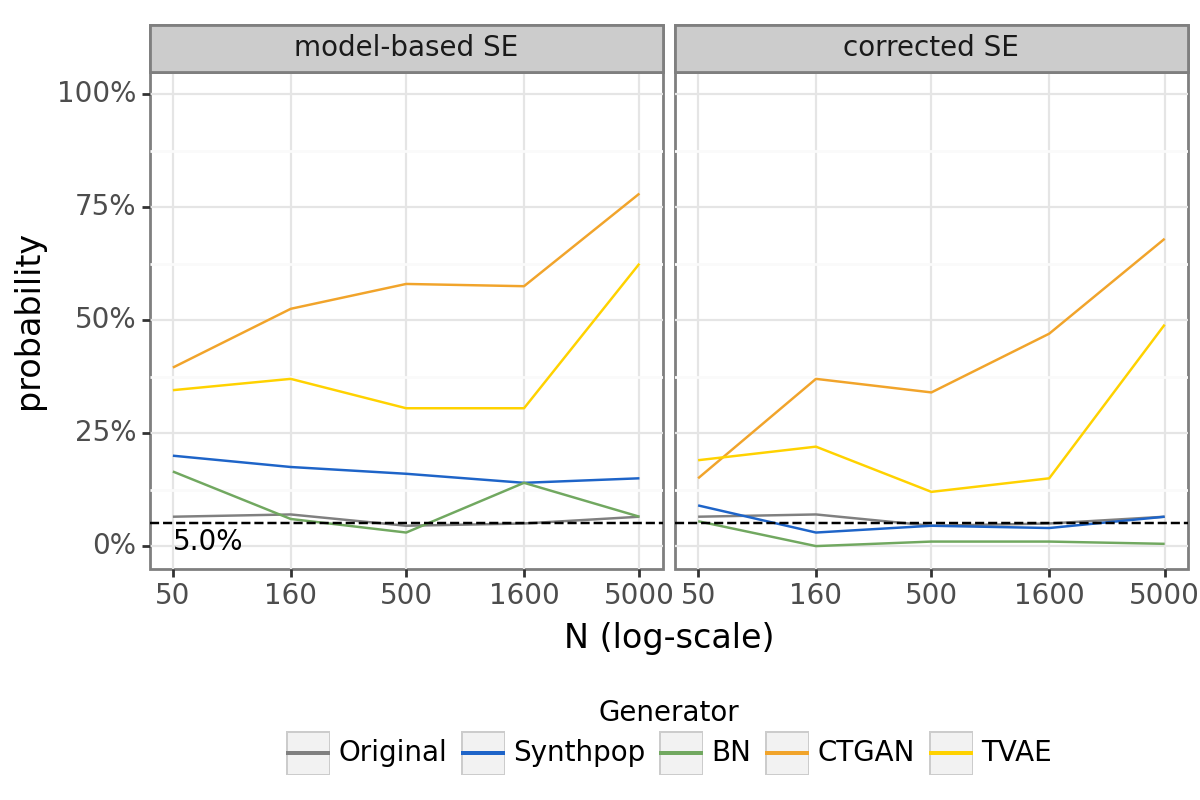

<Figure Size: (600 x 400)>

In [18]:
# Add text to intercepts
intercepts_text = pd.DataFrame({'error': ['type 1 error', 'type 1 error'], 
                                'corrected': ['model-based SE', 'corrected SE'], 
                                'intercept': [0.05, np.nan], 
                                'generator': ['original']*2}) 
intercepts_text['label'] = intercepts_text.apply(lambda i: str(i['intercept']*100) + '%', axis=1)
intercepts_text['corrected'] = pd.Categorical(intercepts_text['corrected'], categories=['model-based SE', 'corrected SE']) # change order (non-alphabetically)
intercepts_text['error'] = pd.Categorical(intercepts_text['error'], categories=['type 1 error', 'power']) # change order (non-alphabetically)  

# Plot
plot_type_I_II_error(meta_data,
                     select_estimator='age_mean',
                     order_generators=['original', 'synthpop', 'bayesian_network_DAG', 'custom_ctgan', 'custom_tvae'],
                     plot_intercept=False,
                     figure_size=(6,4)) +\
    geom_hline(yintercept=0.05, linetype='dashed') +\
    geom_text(data=intercepts_text, mapping=aes(x=50, y='intercept.astype(float)-.01', label='label'), ha='left', va='top', colour='black', size=10) +\
    facet_wrap('corrected')  +\
    labs(color='Generator', linetype='Generator', x='N (log-scale)') +\
    scale_colour_manual(values={'original': '#808080', 'synthpop': '#1E64C8', 'bayesian_network_DAG': '#71A860', # relabel legend
                                'custom_ctgan': '#F1A42B', 'custom_tvae': '#FFD200'},
                        labels = ['Original', 'Synthpop', 'BN', 'CTGAN', 'TVAE']) +\
    scale_linetype_manual(values={'original': 'solid', 'synthpop': 'solid', 'bayesian_network_DAG': 'solid', # relabel legend
                                  'custom_ctgan': 'solid', 'custom_tvae': 'solid'},
                          labels = ['Original', 'Synthpop', 'BN', 'CTGAN', 'TVAE']) +\
    theme(plot_title=element_blank(),
          axis_title=element_text(size=12),
          strip_text=element_text(size=10),
          axis_text=element_text(size=10),  
          legend_position='bottom',
          legend_title=element_text(size=10),
          legend_title_align='center',
          legend_text=element_text(size=10))